In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
data_archive = pd.read_csv('breach_report_archive.csv')

data_archive['Breach Submission Date'] = pd.to_datetime(data_archive['Breach Submission Date'])

data_archive['Breach Submission Date Monthly'] = data_archive['Breach Submission Date'].dt.to_period('M')
data_archive['Breach Submission Date Monthly'] = data_archive['Breach Submission Date Monthly'].astype(str)
data_archive['Breach Submission Date Monthly'] = pd.to_datetime(data_archive['Breach Submission Date Monthly']).dt.date.astype(str)


data_archive['Year'] = data_archive['Breach Submission Date'].dt.year

data_archive['weekday_num'] = data_archive['Breach Submission Date'].dt.dayofweek
data_archive['Weekday'] = np.where(data_archive['weekday_num']==0, 'Monday',
                                   np.where(data_archive['weekday_num']==1, 'Tuesday',
                                           np.where(data_archive['weekday_num']==2, 'Wednesday',
                                                   np.where(data_archive['weekday_num']==3, 'Thursday',
                                                           np.where(data_archive['weekday_num']==4, 'Friday',
                                                                   np.where(data_archive['weekday_num']==5, 'Saturday', 'Sunday'))))))

data_archive['Year'] = data_archive['Breach Submission Date'].dt.year

data_archive['Type of Breach'] = data_archive['Type of Breach'].replace({"Theft, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Loss, Theft": "Multiple",
                                                                        "Hacking/IT Incident, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Other, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Improper Disposal, Loss": "Multiple",
                                                                        "Improper Disposal, Loss, Theft": "Multiple",
                                                                        "Other, Theft": "Multiple",
                                                                        "Loss, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Other, Theft, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Hacking/IT Incident, Theft, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Other, Unknown": "Multiple",
                                                                        "Loss, Other": "Multiple",
                                                                        "Hacking/IT Incident, Other": "Multiple",
                                                                        "Hacking/IT Incident, Other": "Multiple",
                                                                        "Improper Disposal, Theft, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Loss, Other, Theft": "Multiple",
                                                                        "Hacking/IT Incident, Other, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Other, Unknown": "Multiple",
                                                                        "Loss, Other": "Multiple",
                                                                        "Hacking/IT Incident, Other": "Multiple",
                                                                        "Improper Disposal, Theft, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Loss, Other, Theft": "Multiple",
                                                                        "Hacking/IT Incident, Other, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Loss, Theft, Unauthorized Access/Disclosure, Unknown": "Multiple",
                                                                        "Improper Disposal, Theft": "Multiple",
                                                                        "Hacking/IT Incident, Theft": "Multiple",
                                                                        "Hacking/IT Incident, Improper Disposal, Loss, Other, Theft, Unauthorized Access/Disclosure, Unknown": "Multiple",
                                                                        "Loss, Unknown": "Multiple",
                                                                        "Improper Disposal, Unauthorized Access/Disclosure": "Multiple",
                                                                        "Loss, Unauthorized Access/Disclosure, Unknown": "Multiple",}) 

data_archive.sort_values(by='Breach Submission Date', ignore_index=True, inplace=True)

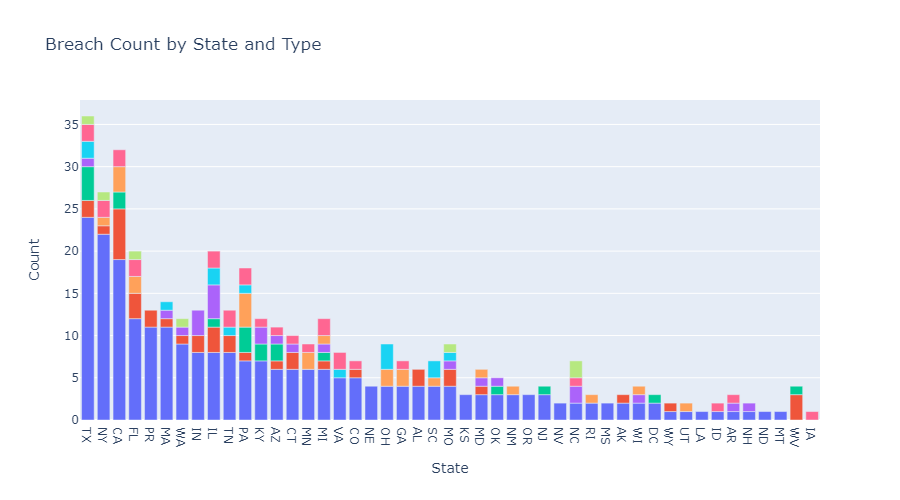

In [3]:
states_breach = data_archive[data_archive['Year'].isin([2010, 2011])].groupby(['State', 'Type of Breach'])['State'].count().rename('Count').to_frame()
states_breach = states_breach.reset_index()
states_breach.sort_values(by='Count', ascending=False, inplace=True)

fig = px.bar(states_breach, x='State', y='Count', color='Type of Breach',
            title='Breach Count by State and Type', width=900)
fig.update(layout_showlegend=False)
fig.show(renderer='png')

**Top 5 states that have most reported breaches in total:**

1. Texas,
2. New York,
3. California,
4. Florida,
5. Puerto Rico.

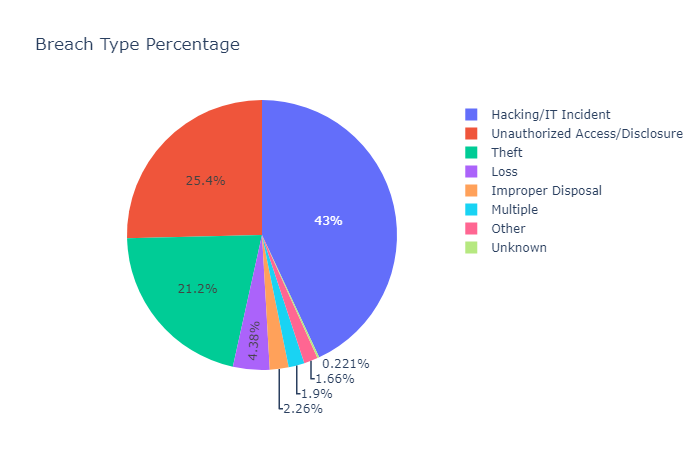

In [4]:
breachTypes = data_archive['Type of Breach'].value_counts()

fig = px.pie(breachTypes,
            names=breachTypes.index,
            values=breachTypes.values,
            title='Breach Type Percentage')
fig.update_layout(width=700, height=450)
fig.show(renderer='png')

Most common breach is "Hacking/IT Incident", second and third popular ones are "Unauthorized Access/Disclosure" and "Theft".

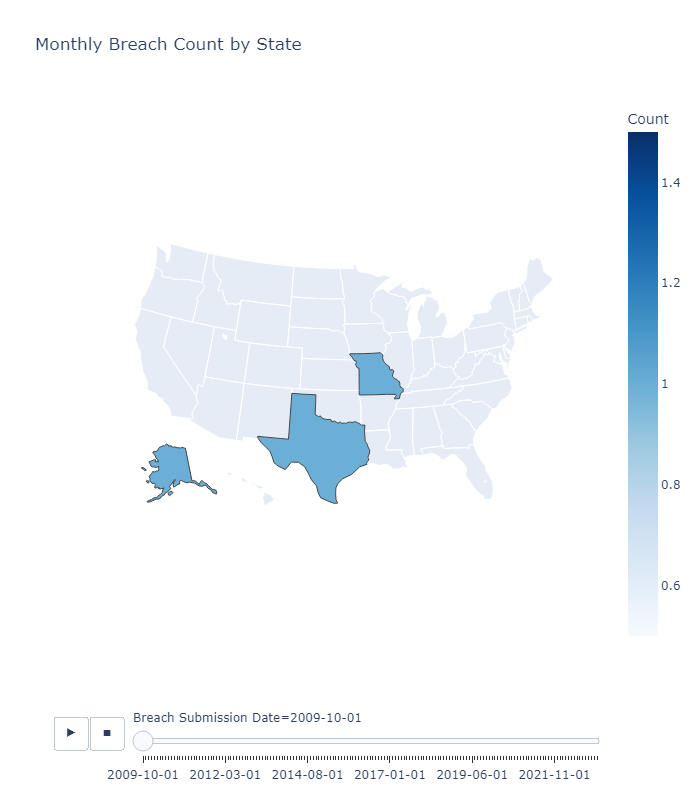

In [5]:
map_data = data_archive.groupby(['State', 'Breach Submission Date'])['State'].count().rename('Count').to_frame()
map_data = map_data.reset_index()
map_data['Breach Submission Date'] = map_data['Breach Submission Date'].dt.to_period('M')
map_data['Breach Submission Date'] = map_data['Breach Submission Date'].astype(str)

map_data['Breach Submission Date'] = pd.to_datetime(map_data['Breach Submission Date']).dt.date.astype(str)
map_data = map_data.sort_values("Breach Submission Date")

fig = px.choropleth(map_data,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Count',
                    color_continuous_scale="blues",
                    animation_frame='Breach Submission Date',
                    title='Monthly Breach Count by State',
                   height=800)
fig.show(renderer='png')

Drag the circle below to right or left to get a specific date.

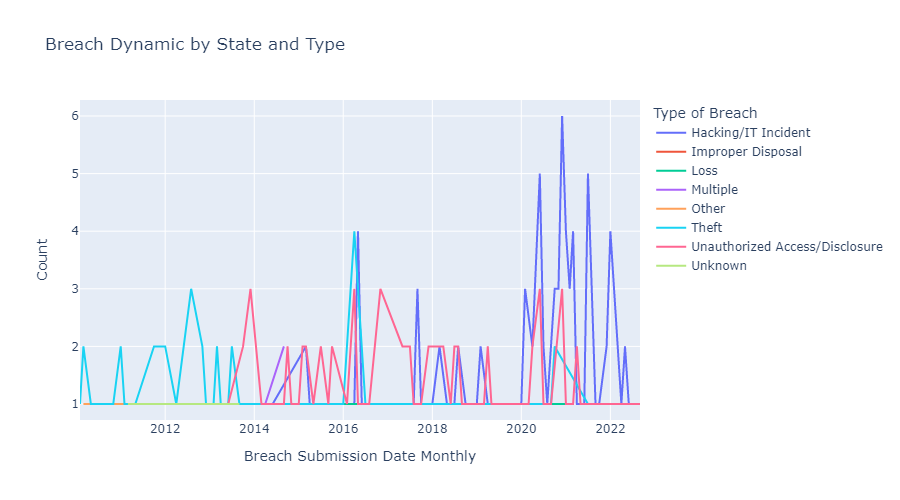

In [6]:
breaches = data_archive.groupby(['State',  'Type of Breach', 'Breach Submission Date Monthly'])['Type of Breach'].count().rename('Count').to_frame()
breaches = breaches.reset_index()


fig = px.line(breaches[breaches['State'].isin(['FL'])],
              x="Breach Submission Date Monthly", y="Count",
              color='Type of Breach',
              title='Breach Dynamic by State and Type', width=900)
fig.show(renderer='png')

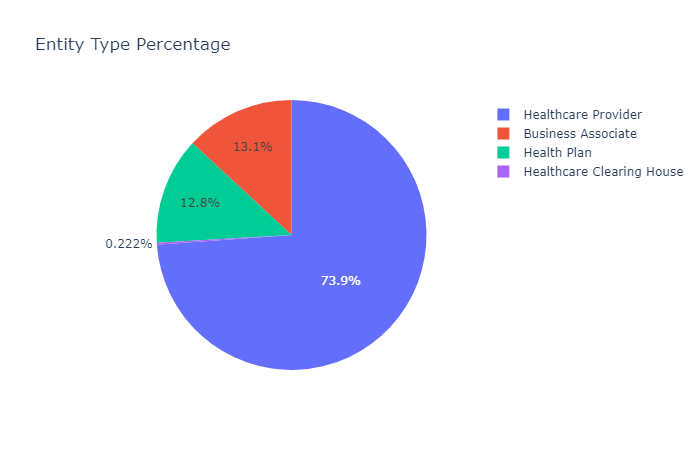

In [7]:
entityTypes = data_archive['Covered Entity Type'].value_counts()

fig = px.pie(entityTypes,
            names=entityTypes.index,
            values=entityTypes.values,
            title='Entity Type Percentage')
fig.update_layout(width=700, height=450)
fig.show(renderer='png')

There are 4 types of covered entities in data and here are the proportions of each one:
1. Healthcare Provider - 74%,
2. Business Associate - 13%,
3. Health Plan - 13%.
4. Healthcare Clearing House - 0.2%.

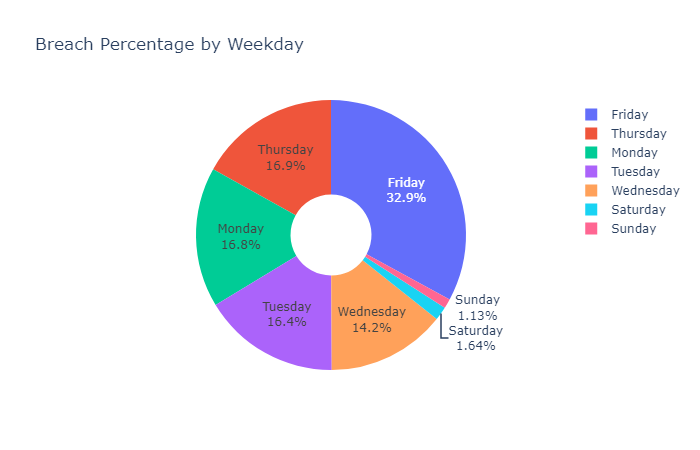

In [8]:
pop_weekdays = data_archive['Weekday'].value_counts()

fig = go.Figure(data=[go.Pie(labels=pop_weekdays.index, values=pop_weekdays.values, hole=.3)])

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text="Breach Percentage by Weekday", width=700, height=450)
fig.show(renderer='png')

* Highest amount of breaches are reported on Friday.
* Lowest amount of breaches are reported on Saturday and Sunday.

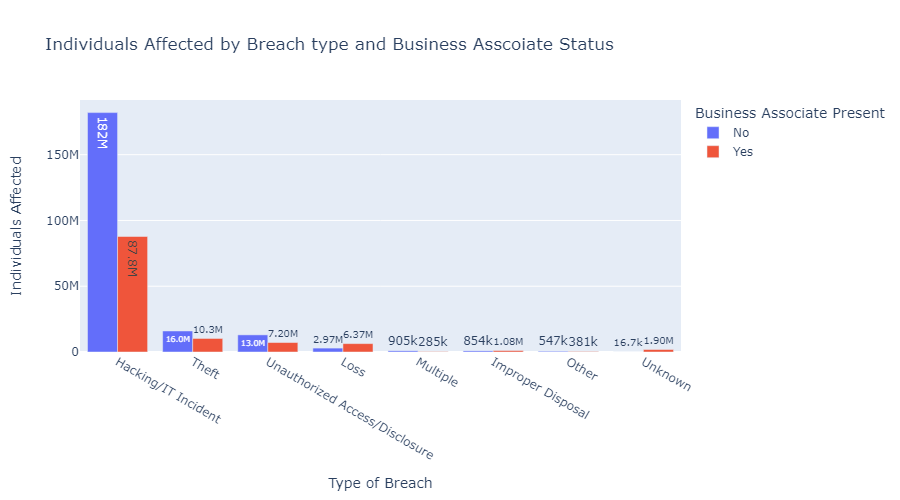

In [9]:
individuals_affected = data_archive.groupby(['Type of Breach', 'Business Associate Present'])['Individuals Affected'].sum().to_frame()
individuals_affected = individuals_affected.reset_index()
individuals_affected.sort_values(by='Individuals Affected', ascending=False, inplace=True)

fig = px.bar(individuals_affected, x='Type of Breach', y='Individuals Affected', color='Business Associate Present',
             barmode='group', text_auto='.3s',
             title='Individuals Affected by Breach type and Business Asscoiate Status', width=900)
fig.show(renderer='png')

In [10]:
data_archive[data_archive['Type of Breach']=="Theft"]['Individuals Affected'].sum()/data_archive['Individuals Affected'].sum()

0.07923917652286014

* 81% of individuals were affected by an "Hacking/IT Incident" type of breach and 33% of them were Business Associates.
* 8% of individuals were affected by an "Theft" type of breach and 40% of them were Business Associates.
* Individuals were the least affected by the "Loss", "Improper Disposal" and "Other" types of breaches.

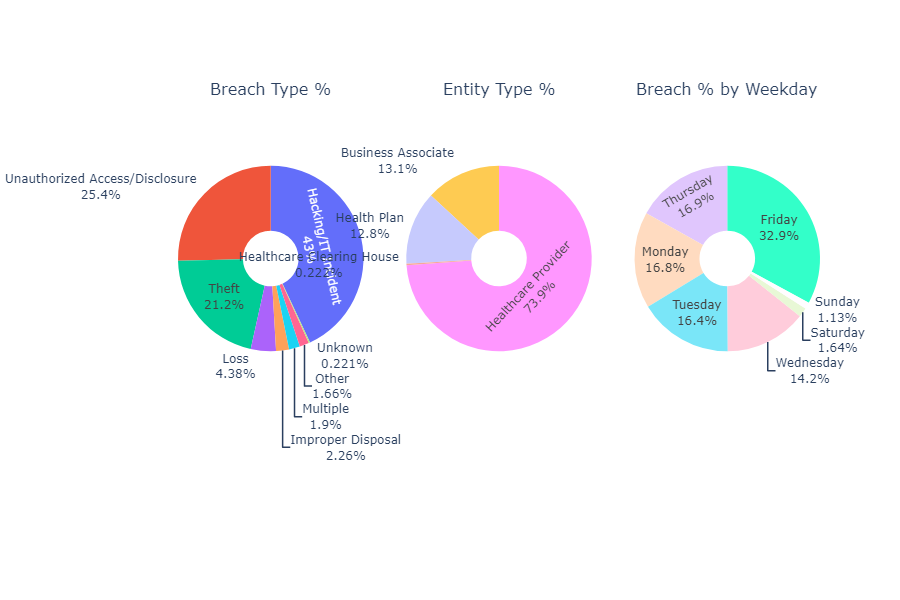

In [11]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                   subplot_titles=['Breach Type %', "Entity Type %", "Breach % by Weekday"])

breachTypes = data_archive['Type of Breach'].value_counts()
entityTypes = data_archive['Covered Entity Type'].value_counts()
pop_weekdays = data_archive['Weekday'].value_counts()

fig.add_trace(go.Pie(
     values=breachTypes.values,
     labels=breachTypes.index,
    hole=.3,
     domain=dict(x=[0, 0.3])), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=entityTypes.values,
     labels=entityTypes.index,
    hole=.3,
     domain=dict(x=[0.3, 0.6])), 
     row=1, col=2)

fig.add_trace(go.Pie(
    values=pop_weekdays.values,
    labels=pop_weekdays.index,
    hole=.3,
     domain=dict(x=[0.6, 1])), 
     row=1, col=3)
fig.update(layout_showlegend=False)
fig.update_layout(width=900, height=600)
fig.update_traces(textinfo='percent+label')
fig.show(renderer='png')

## Most common words in Web Description

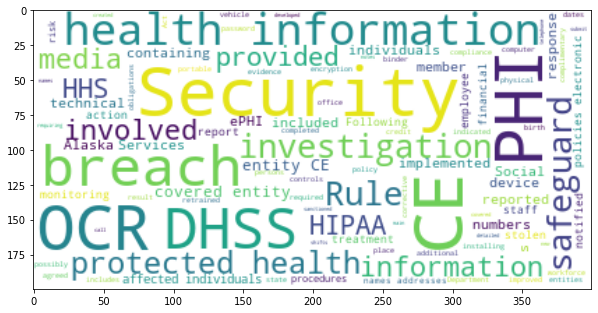

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = data_archive['Web Description'].values 

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()